In [ ]:
# ライブラリをimport
from openai import OpenAI
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from getpass import getpass
from sklearn.metrics.pairwise import cosine_similarity

# OpenAI APIキーの入力
client = OpenAI(
  api_key=getpass("OpenAI APIキーを入力してください: ")
)

--- len(embeddings[0])
1536
--- embeddings[0][:3]
[-0.010241693817079067, -0.011292420327663422, 0.009958806447684765]
--- norms
[0.9999999737413982, 0.9999999419558276, 1.0000000648886858, 1.0000000574181147, 1.0000000257994035]


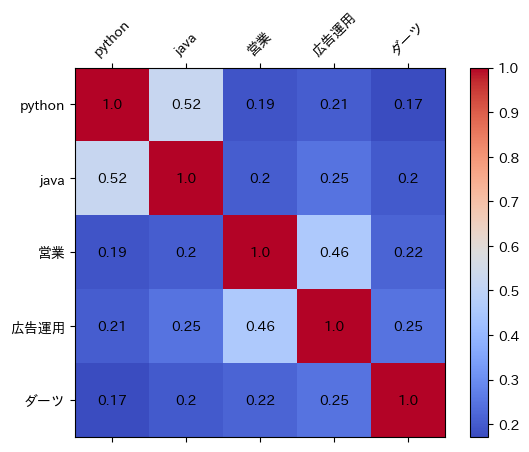

In [ ]:
# embeddingするテキスト
TEXTS = [
    'python',
    'java',
    '営業',
    '広告運用',
    'ダーツ'
]

# 各テキストの埋め込みを取得
def get_embeddings(texts, engine="text-embedding-3-small"):
    response = client.embeddings.create(input=texts, model=engine)
    embeddings = [embedding.embedding for embedding in response.data]
    return embeddings

embeddings = get_embeddings(TEXTS)

# ベクトルの形状をチェック
# 次元数
print('--- len(embeddings[0])')
print(len(embeddings[0]))

# ベクトルを何次元か出力
print('--- embeddings[0][:3]')
print(embeddings[0][:3])

# ノルム
norms = [np.linalg.norm(np.array(embedding)) for embedding in embeddings]
print('--- norms')
print(norms)

# 各テキスト同士のコサイン類似度を表示
# コサイン類似度を計算
similarity_matrix = cosine_similarity(embeddings)

# DataFrameに変換
df = pd.DataFrame(similarity_matrix, index=TEXTS, columns=TEXTS)

# Matplotlibでの表示
fig, ax = plt.subplots()
cax = ax.matshow(df.astype(float), cmap="coolwarm")
fig.colorbar(cax)

ax.set_xticks(np.arange(len(df.columns)))
ax.set_yticks(np.arange(len(df.index)))

ax.set_xticklabels(list(df.columns), rotation=45)
ax.set_yticklabels(list(df.index))

# 各セルに数値を描画
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        c = df.iloc[i, j]
        ax.text(j, i, str(round(c, 2)), va='center', ha='center')

plt.show()
